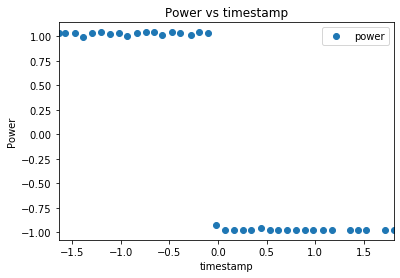

In [11]:
#import time-series from .csv file
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("/home/just/Scaricati/esempi_carica.csv")
df2 = pd.read_csv("/home/just/Scaricati/feed_54.MYD.csv", nrows = 37)
from sklearn import preprocessing
# Get column names first
names1 = df1.columns
names2 = df2.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df1 = scaler.fit_transform(df1)
scaled_df2 = scaler.fit_transform(df2)
scaled_df1 = pd.DataFrame(scaled_df1, columns=names1)
scaled_df2 = pd.DataFrame(scaled_df2,columns=names2)
X_test = scaled_df2.iloc[:,0]      #testing
y_test = scaled_df2.iloc[:,1]
x = scaled_df1.iloc[:,0]           #training
y = scaled_df2.iloc[:,1]
%matplotlib inline
#plot the model for training
scaled_df1.plot(x='timestamp', y='power', style='o')
plt.title('Power vs timestamp')
plt.xlabel('timestamp')
plt.ylabel('Power')
plt.show()

In [12]:
#split data into train and set with ratio of 70%/30%
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0., random_state=0,shuffle = False)

In [46]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1000, gamma=10,epsilon = 0.1)
y_pred = svr_rbf.fit(x.values.reshape(-1,1), y).predict(X_test.values.reshape(-1,1))
print("predizione effettuata")
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predizione effettuata


In [47]:
#evaluate results
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df.head()

Mean Absolute Error: 0.09487546988634371
Mean Squared Error: 0.017401834889392957
Root Mean Squared Error: 0.13191601452967322


,Actual,Predicted
0,1.029494,0.929227
1,1.029494,0.982449
2,1.031334,1.045631
3,0.994070,1.094488
4,1.029494,1.092788


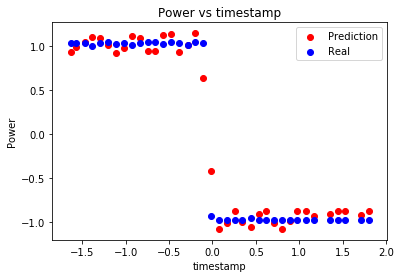

In [48]:
#plot predicted and real results and compare them
df2= pd.DataFrame({'timestamp': X_test,'' 'Predicted': y_pred, 'Real' : y_test})
plt.scatter(df2.timestamp,df2.Predicted,color = 'r', label = 'Prediction')
plt.scatter(df2.timestamp,df2.Real,color = 'b', label = 'Real')
plt.title('Power vs timestamp')
plt.xlabel('timestamp')
plt.ylabel('Power')
plt.legend(loc = 'upper right')
plt.show()